##  CAR PRICE PREDICTION  PROJECT

### ========================================TASK-3=======================================

In [69]:
#importing the  required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### LOADING THE DATASET

In [3]:
dataset = pd.read_csv(r"C:\Users\India\Downloads\archive (2)\CarPrice_Assignment.csv")

In [4]:
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## EDA (EXPLORATORY DATA ANALYSIS)

### STEP-1


### 1.UNDERSTANDING THE DATASET.

In [266]:
dataset.shape# dataset consists of 205 rows & 26 columns.

(205, 26)

In [267]:
dataset.info() # to know the datatypes of the columns in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [268]:
dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [269]:
dataset.describe() # to know the basic statistics of the dataset

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [270]:
dataset.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [271]:
dataset.nunique() #it gives the  count of unique  no.s present in the columns

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

## STEP-2

## DATA CLEANING

### REMOVING UNWANTED COLUMNS

In [272]:
 #drop---- used to delete the column from the dataset.
# inplace = True---- used for updating the dataset.

In [5]:
dataset.drop(columns=["car_ID"] ,inplace = True)  # DROPPPING "car_ID" column

In [6]:
#dataset.groupby(by="CarName")["CarName"].count()

In [7]:
# SPLITTING THE "COMPANY NAME"  FROM "CARNAME" COLUMN.

In [8]:
dataset[["CarCompany","CarName"]]=dataset["CarName"].str.split(" ",1,expand=True)

In [9]:
dataset

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [10]:
dataset.drop(columns=["CarName"],inplace= True)

In [11]:
dataset

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [12]:
dataset["CarCompany"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [13]:
#there are spelling mistakes in the Company names of car.
#so we have to replace the wrong spellings with correct spellings.

In [14]:
# ---maxda = mazda
# ---Nissan = nissan
# ---porsche = porcshce
# ---toyota = toyouta
# ---vokswagen = volkswagen =vw

In [283]:
# replace_dict={}
# for idx,row in upper_outliers.iterrows():
#     if (row["bmi"] - upper_boundary)  < 500:#the values should be taken are very near
#         replace_dict[row["bmi"]]= upper_boundary

In [15]:
corrections ={'mazda' : 'maxda',
              'nissan' : 'Nissan',
              'porcshce' : 'porsche',
              'toyouta' : 'toyota' ,
              'vokswagen' : 'volkswagen',
              'vw' :'volkswagen'}

In [16]:
def correct_spelling(value):
    return corrections.get(value, value)

In [17]:
dataset["CarCompany"] = dataset["CarCompany"].apply(correct_spelling)

In [18]:
dataset

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [19]:
dataset["CarCompany"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### HANDLING MISSING VALUES

In [21]:
dataset.isnull().sum()  #  THERE ARE NO MISSING VALUES IN THE ENTIRE DATASET.

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
CarCompany          0
dtype: int64

## VISUALIZATION

In [23]:
dataset.head(3)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero


## VISUALIZATION


<AxesSubplot:xlabel='price', ylabel='Density'>

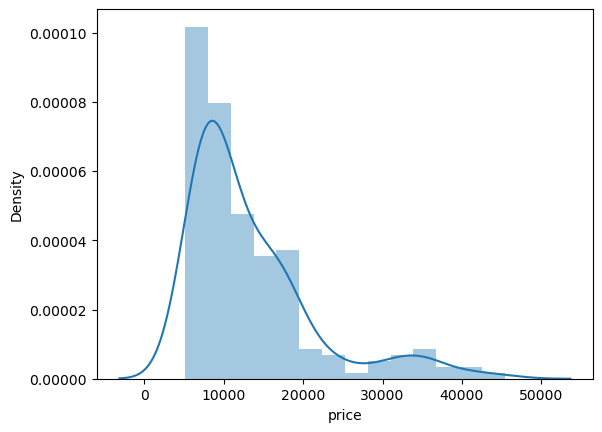

In [18]:
sns.distplot(dataset["price"],hist=True,
    kde=True)

In [ ]:
#the plot seemed to right-skewed.

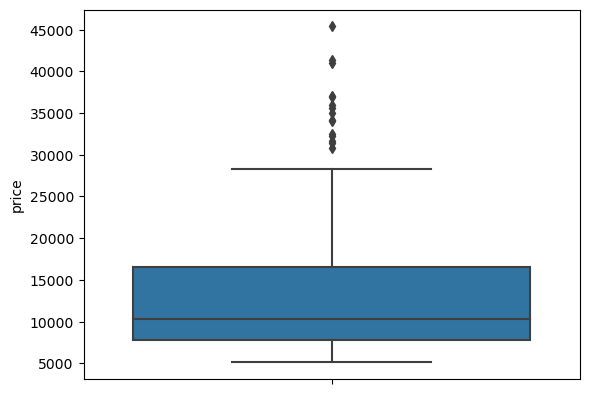

In [36]:
sns.boxplot(y=dataset["price"])
plt.show()

OBSERVATION:

---There is a significant difference between mean & median.

---From boxplot we can observe that most of the prices are below 18,000 whereas the remaining  prices are between 18,000 to 45000.

In [75]:
dataset.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CarCompany'],
      dtype='object')

### CATEGORICAL COLUMNS

###### CarCompany
###### symboling
###### fueltype
##### aspiration
##### doornumber

###### carbody

###### drivewheel

###### enginelocation

###### enginetype

###### cylindernumber

###### fuelsystem

In [88]:
# x=dataset.CarCompany.value_counts()

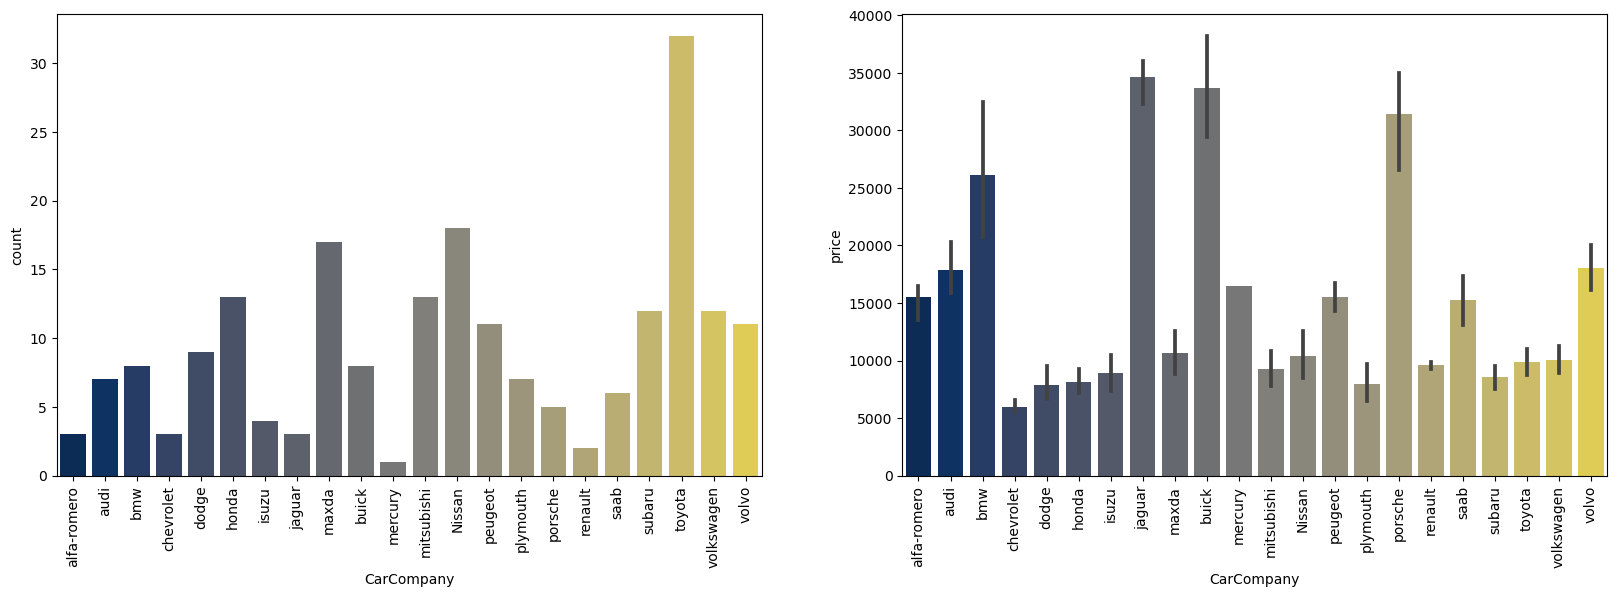

In [56]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(x=dataset["CarCompany"],palette='cividis')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x=dataset["CarCompany"],y=dataset["price"],palette='cividis')
plt.xticks(rotation=90)
plt.show()

OBSERVATION:

###### From countplot we can observe that "Toyota"  is favored CarCompany.
###### The price of "Toyota" seems to be Medium level,not that much  of high price.
##### "Jaguar" and "Buick" seems to have highest price.

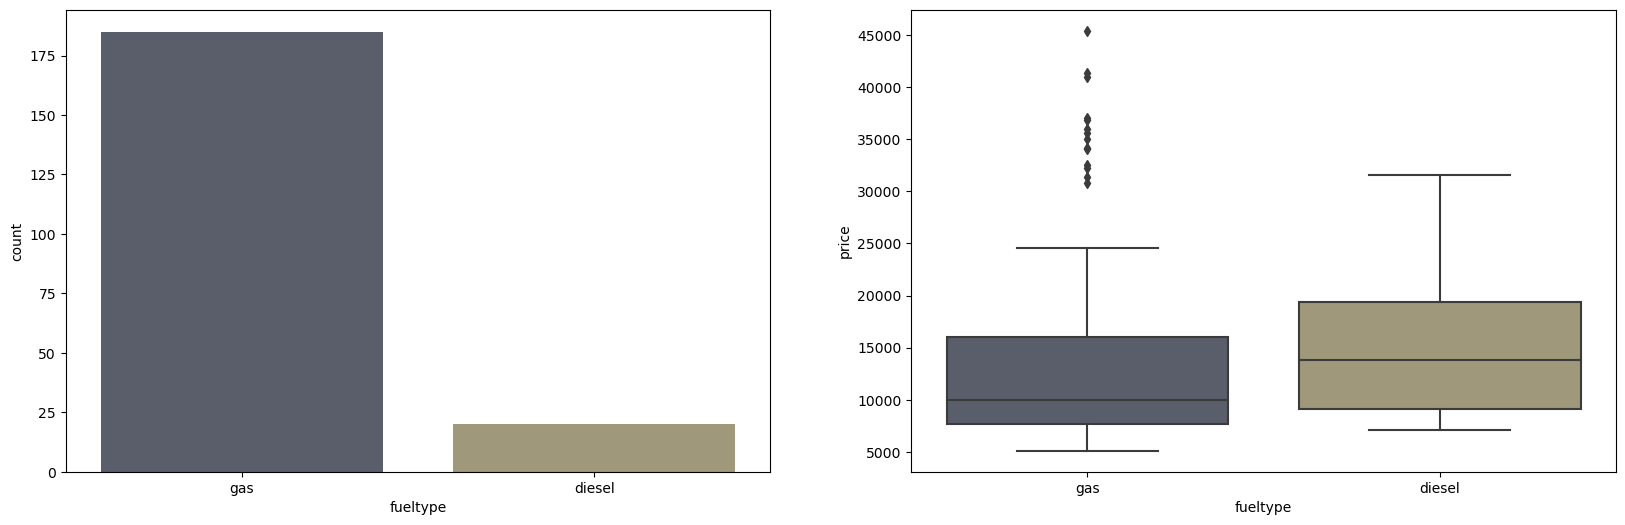

In [68]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(x=dataset["fueltype"],palette='cividis')

plt.subplot(1,2,2)
sns.boxplot(x=dataset["fueltype"],y=dataset["price"],palette='cividis')
plt.show()

###### number of "Gas" fuel cars are more than Diesel.
###### The prices for Gas fuel cars are higher than diesel fuel cars.

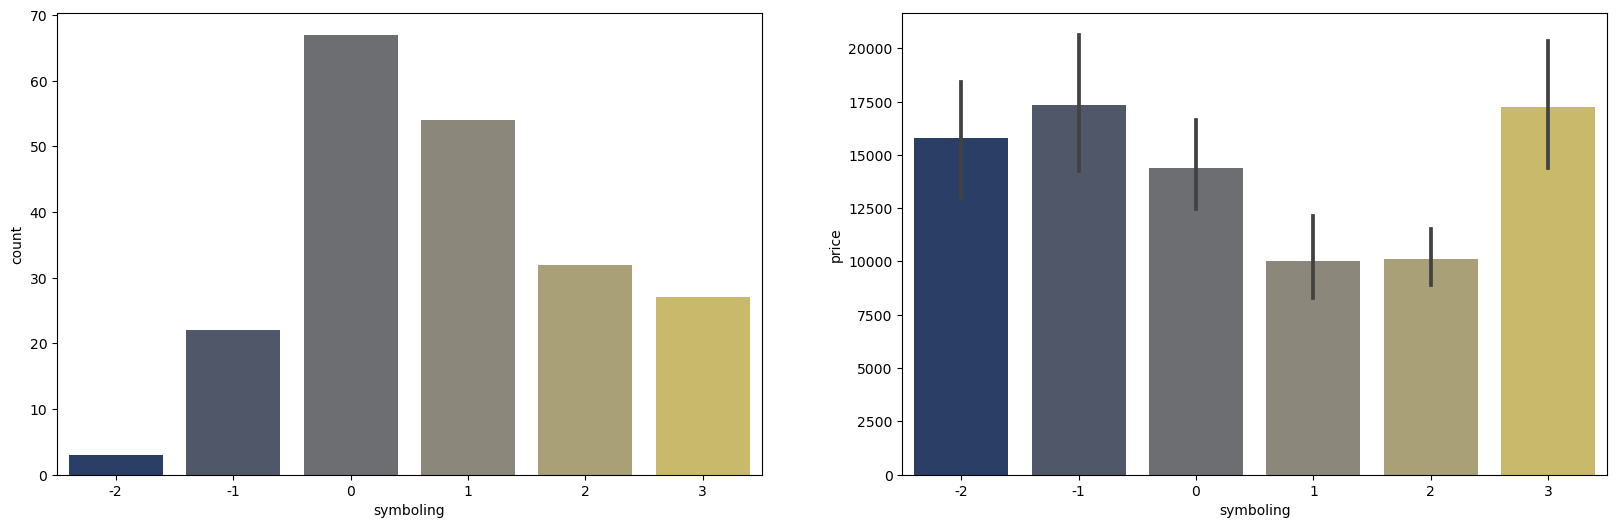

In [46]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(x=dataset["symboling"],palette='cividis')

plt.subplot(1,2,2)
sns.barplot(x=dataset["symboling"],y=dataset["price"],palette='cividis')
plt.show()

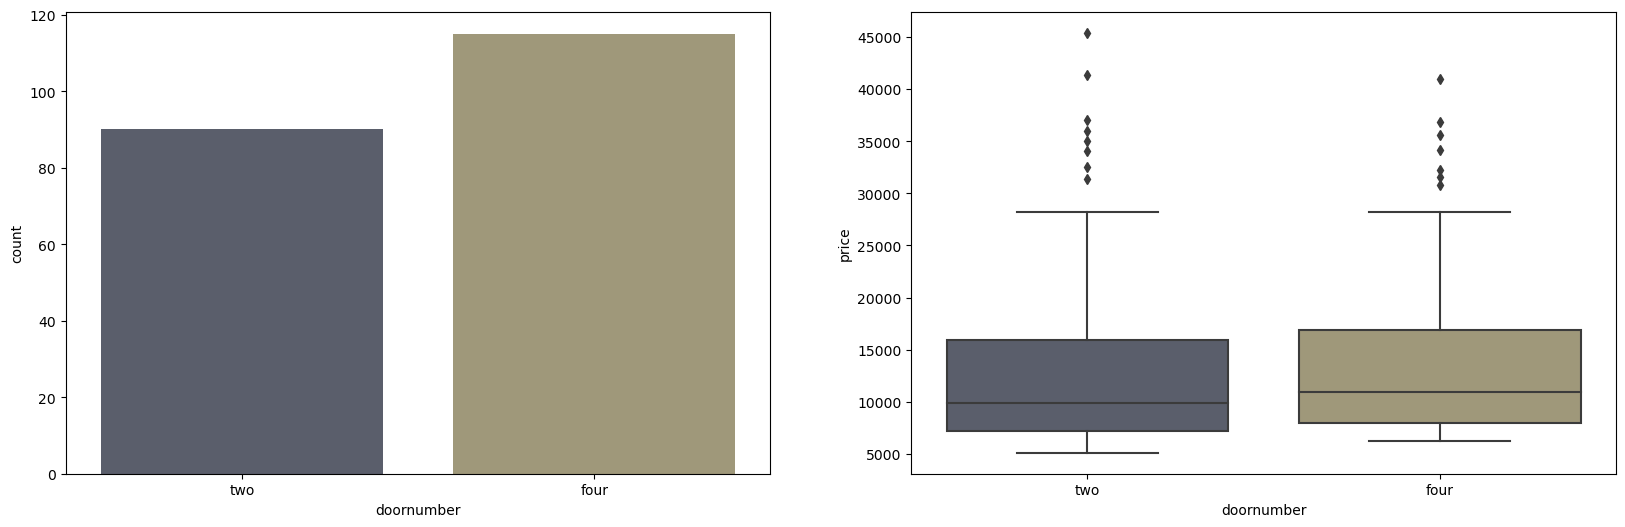

In [69]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(x=dataset["doornumber"],palette='cividis')

plt.subplot(1,2,2)
sns.boxplot(x=dataset["doornumber"],y=dataset["price"],palette='cividis')
plt.show()

###### The price of  both  car types with two or four doors seems to be approximately same price.
###### Four doornumber cars are higher than two doornumber cars.

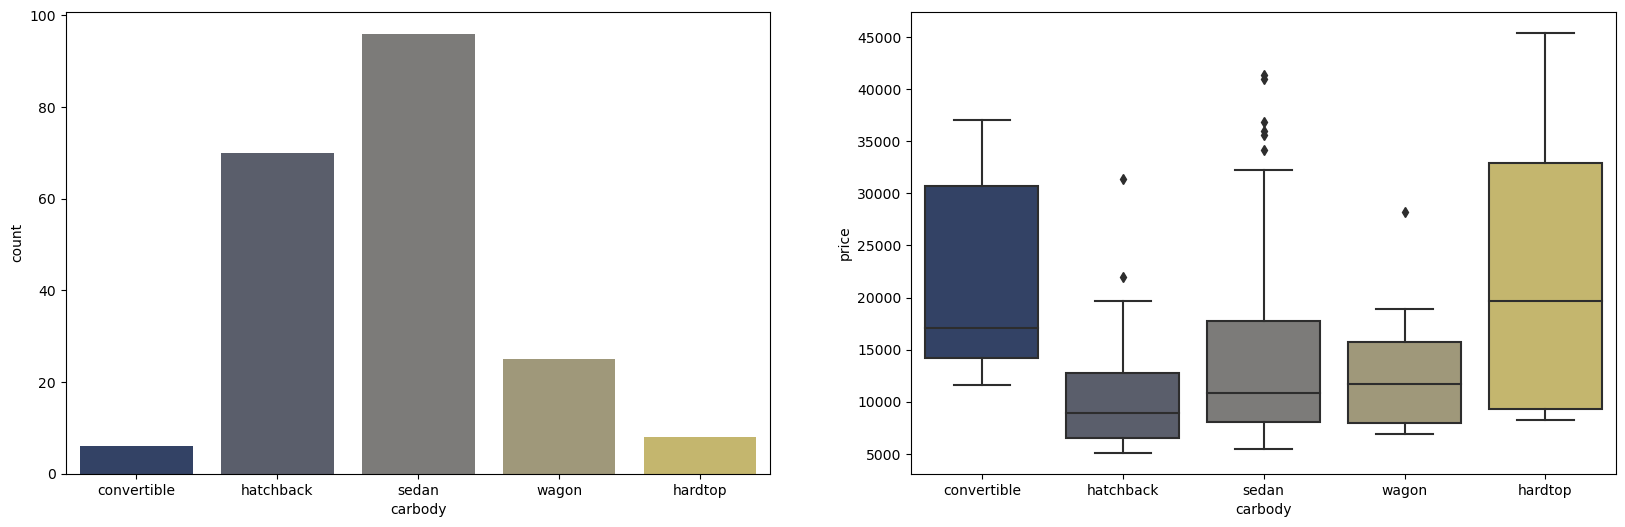

In [70]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(x=dataset["carbody"],palette='cividis')

plt.subplot(1,2,2)
sns.boxplot(x=dataset["carbody"],y=dataset["price"],palette='cividis')
plt.show()

##### hardtop and convertible cars have higher price than other cars.

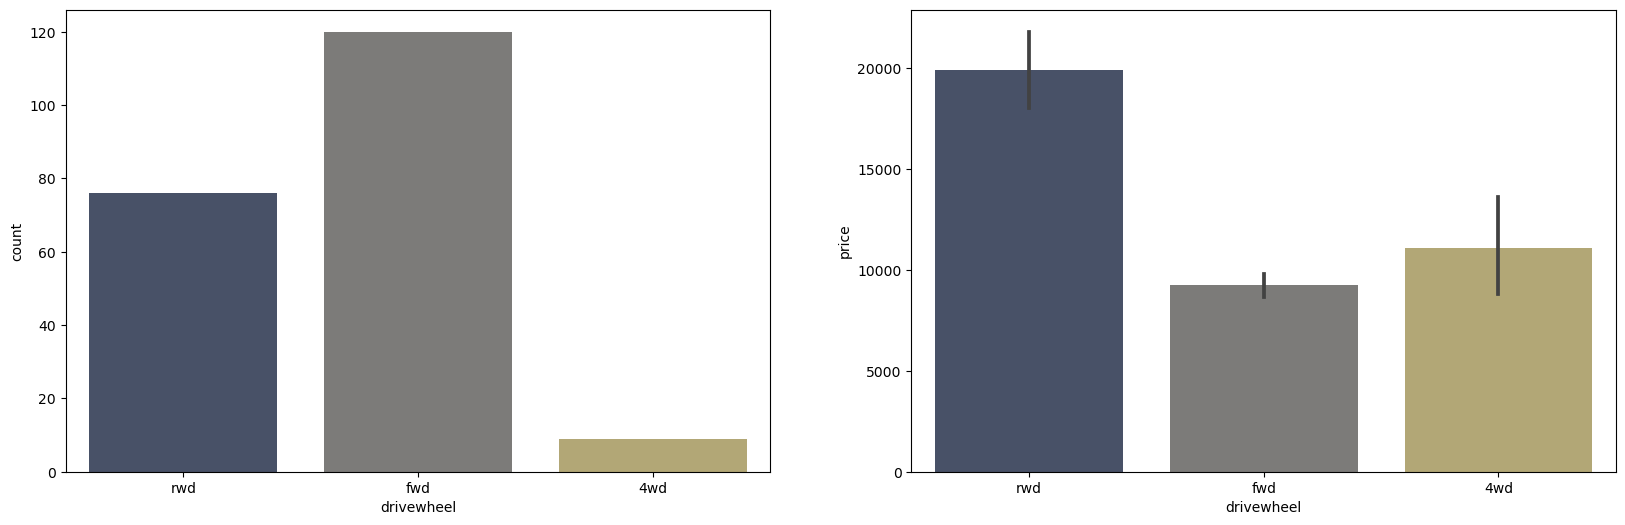

In [43]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(x=dataset["drivewheel"],palette='cividis')

plt.subplot(1,2,2)
sns.barplot(x=dataset["drivewheel"],y=dataset["price"],palette='cividis')
plt.show()

##### Most high ranged cars seems to prefer "rwd" drivewheel.

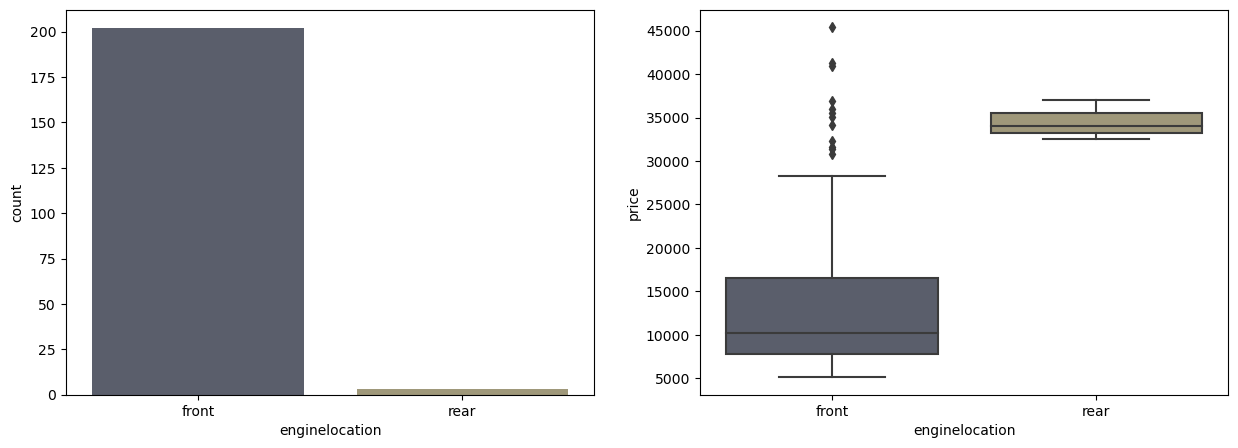

In [71]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=dataset["enginelocation"],palette='cividis')

plt.subplot(1,2,2)
sns.boxplot(x=dataset["enginelocation"],y=dataset["price"],palette='cividis')
plt.show()

##### Most of the favored  cara are front enginelocation.
##### Both the prices of front and rear enginelocation cars are high.

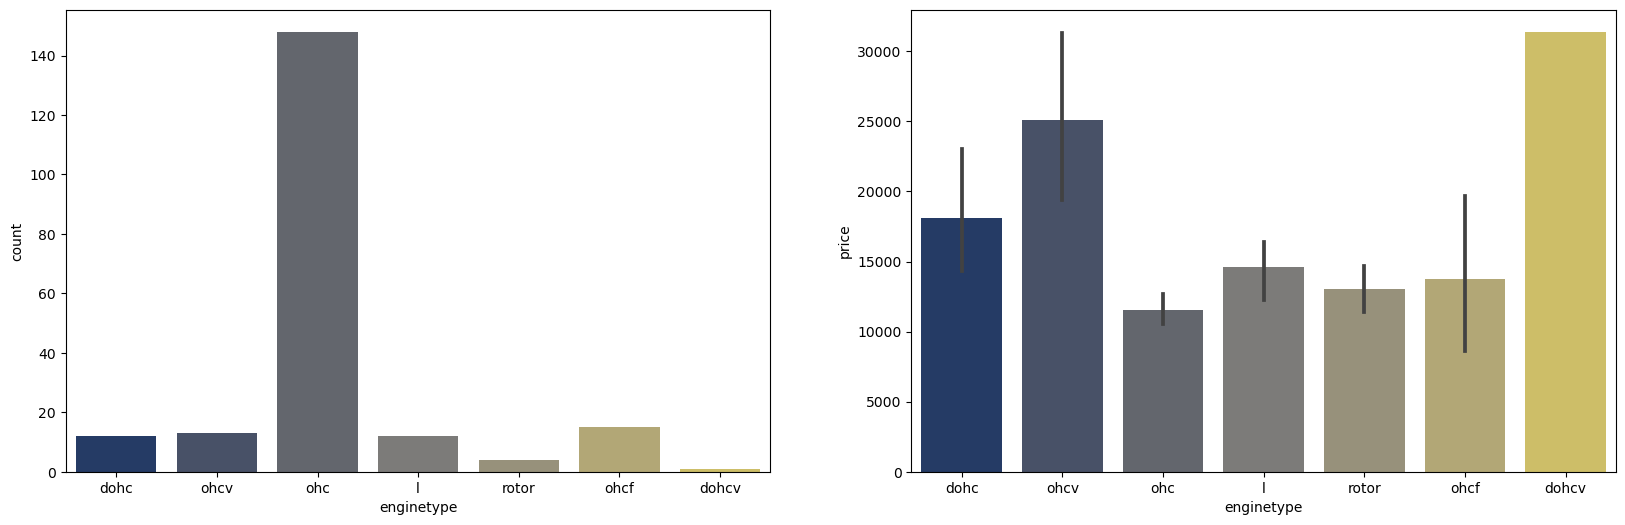

In [40]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(x=dataset["enginetype"],palette='cividis')

plt.subplot(1,2,2)
sns.barplot(x=dataset["enginetype"],y=dataset["price"],palette='cividis')
plt.show()

##### "ohcv"  has the highest price range. "ohc" and "ohcf" has the low price range.
##### "ohc" enginetype is the most favored type.

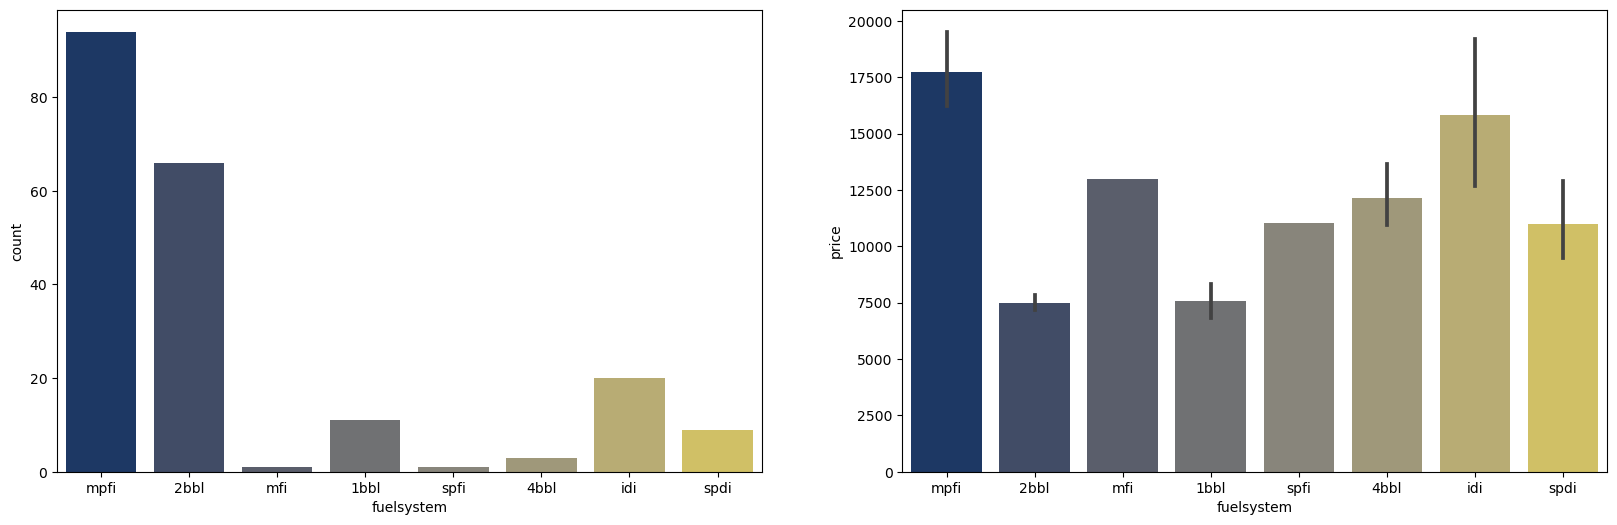

In [55]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(x=dataset["fuelsystem"],palette='cividis')

plt.subplot(1,2,2)
sns.barplot(x=dataset["fuelsystem"],y=dataset["price"],palette='cividis')
plt.show()

##### The most favored fuelsystems are "mpfi" and "2bbl".
##### The price of "mbfi" and "idi" are having highest range.

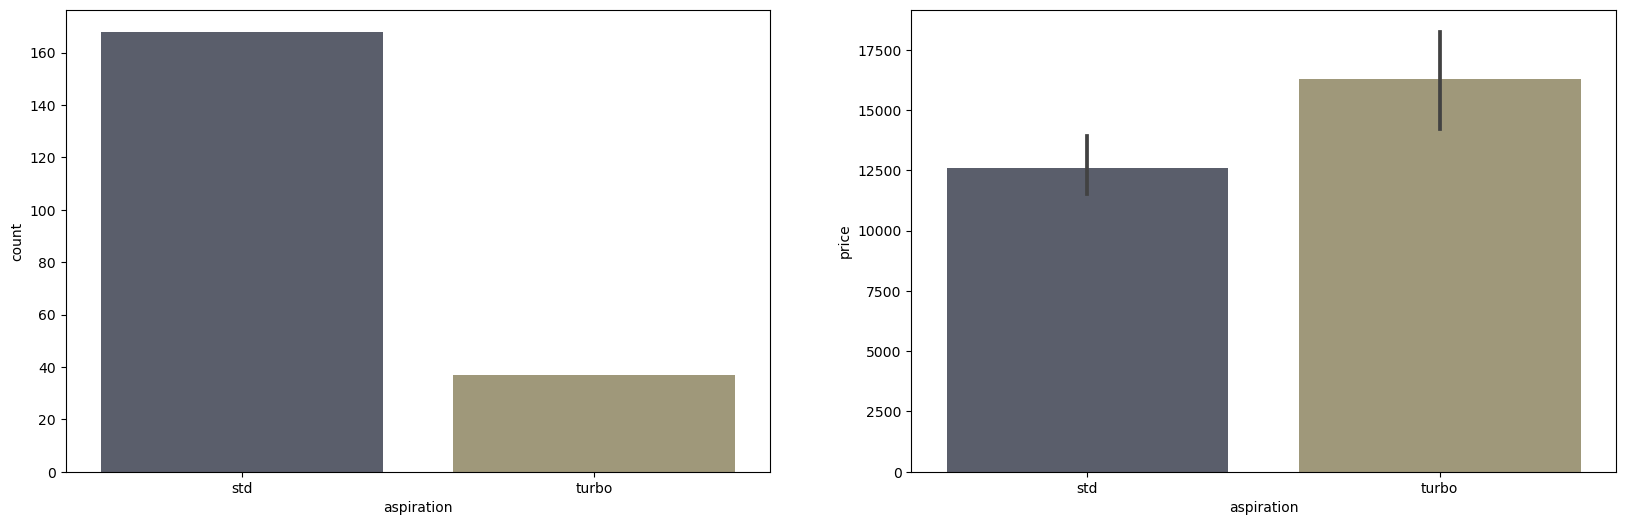

In [48]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(x=dataset["aspiration"],palette='cividis')

plt.subplot(1,2,2)
sns.barplot(x=dataset["aspiration"],y=dataset["price"],palette='cividis')
plt.show()

##### aspiration with turbo having high price range than std aspiration.

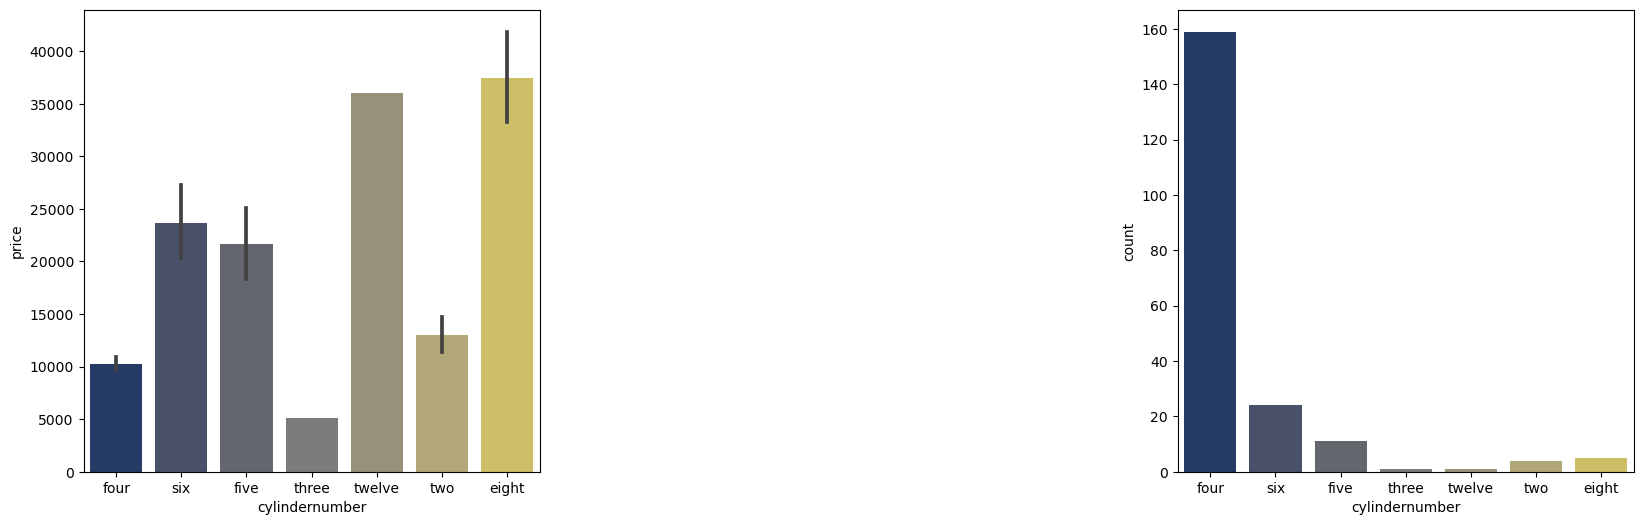

In [54]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.barplot(x=dataset["cylindernumber"],y=dataset["price"],palette='cividis')

plt.subplot(1,3,3)
sns.countplot(x=dataset["cylindernumber"],palette='cividis')
#plt.xticks(rotation=90)
plt.show()

##### Cylindernumber of four is highly preffered.
##### but the cars having cylindernumber with eight and twelve are having high price range.

### NUMERICAL COLUMNS

##### wheelbase
##### carlength         
#####    carwidth          
#####   carheight        
#####   curbweight    
##### enginesize
###### boreratio         
#####   stroke            
#####   compressionratio  
##### horsepower        
#####  peakrpm            
##### citympg            
##### highwaympg       

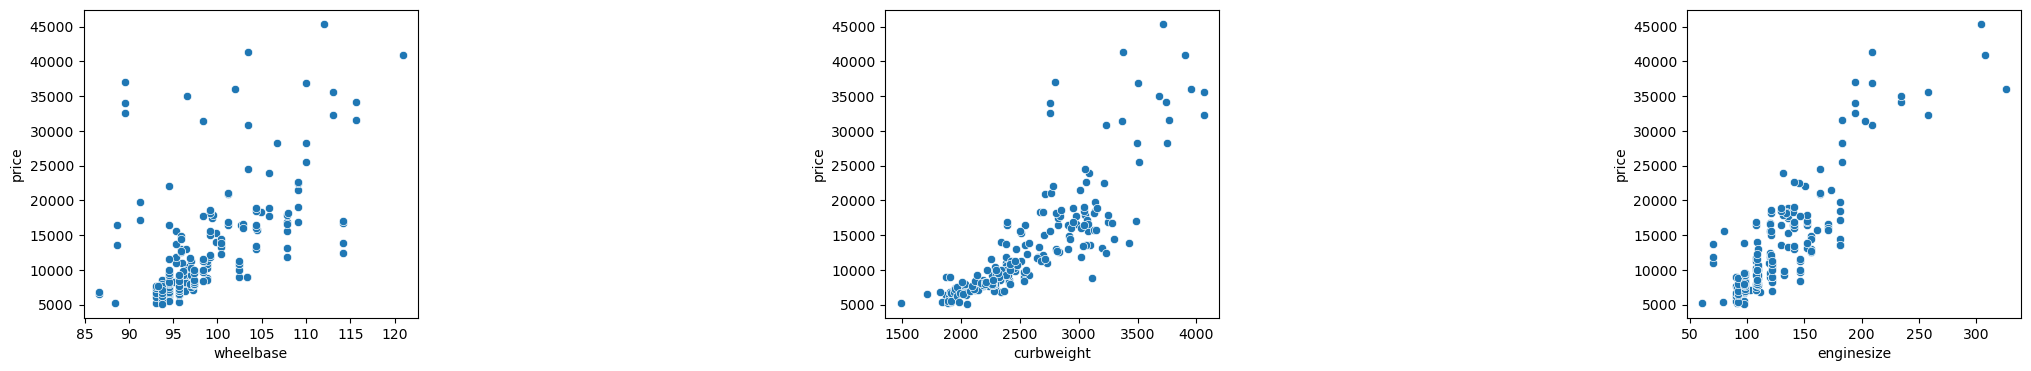

In [31]:
plt.figure(figsize=(25,4))
plt.subplot(1,5,1)
sns.scatterplot(dataset["wheelbase"],dataset["price"])

plt.subplot(1,5,3)
sns.scatterplot(dataset["curbweight"],dataset["price"])

plt.subplot(1,5,5)
sns.scatterplot(dataset["enginesize"],dataset["price"])
plt.show()

##### curbweight  and enginesize seems to have a positive correlation with price.


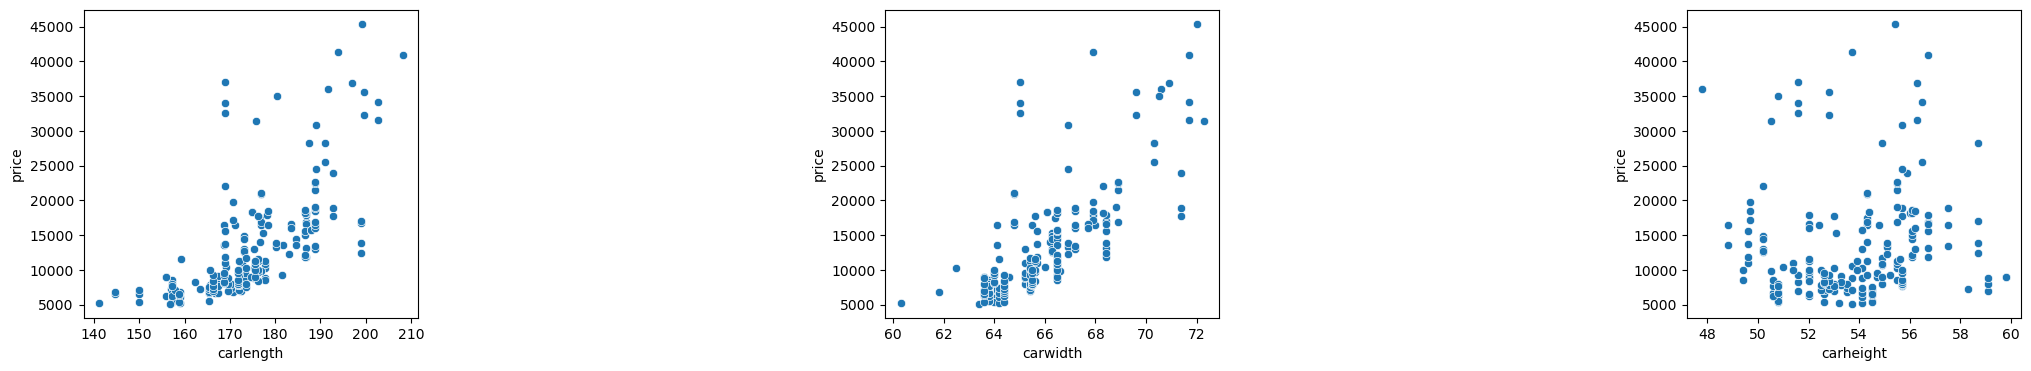

In [32]:
plt.figure(figsize=(25,4))
plt.subplot(1,5,1)
sns.scatterplot(dataset["carlength"],dataset["price"])

plt.subplot(1,5,3)
sns.scatterplot(dataset["carwidth"],dataset["price"])

plt.subplot(1,5,5)
sns.scatterplot(dataset["carheight"],dataset["price"])
plt.show()

##### Carlength and Carwidth have a positive correlation with price.
##### carheight doesn't show any significant relation with price.

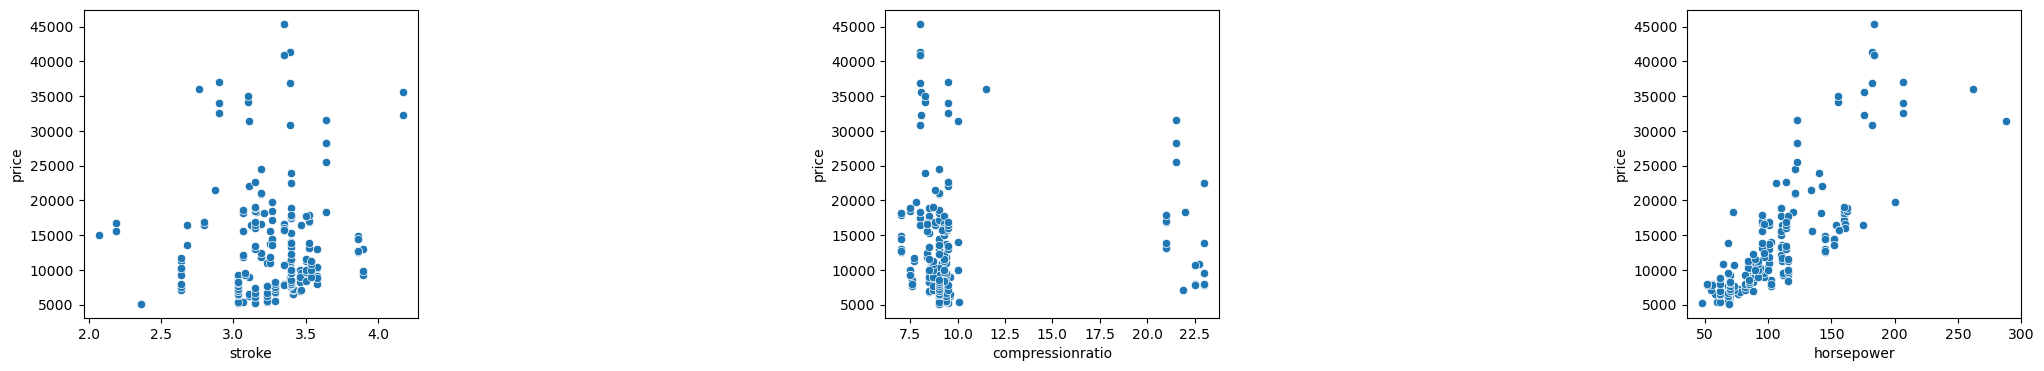

In [33]:
plt.figure(figsize=(25,4))
plt.subplot(1,5,1)
sns.scatterplot(dataset["stroke"],dataset["price"])

plt.subplot(1,5,3)
sns.scatterplot(dataset["compressionratio"],dataset["price"])

plt.subplot(1,5,5)
sns.scatterplot(dataset["horsepower"],dataset["price"])
plt.show()

##### horsepower seems to having positive correlation with price.

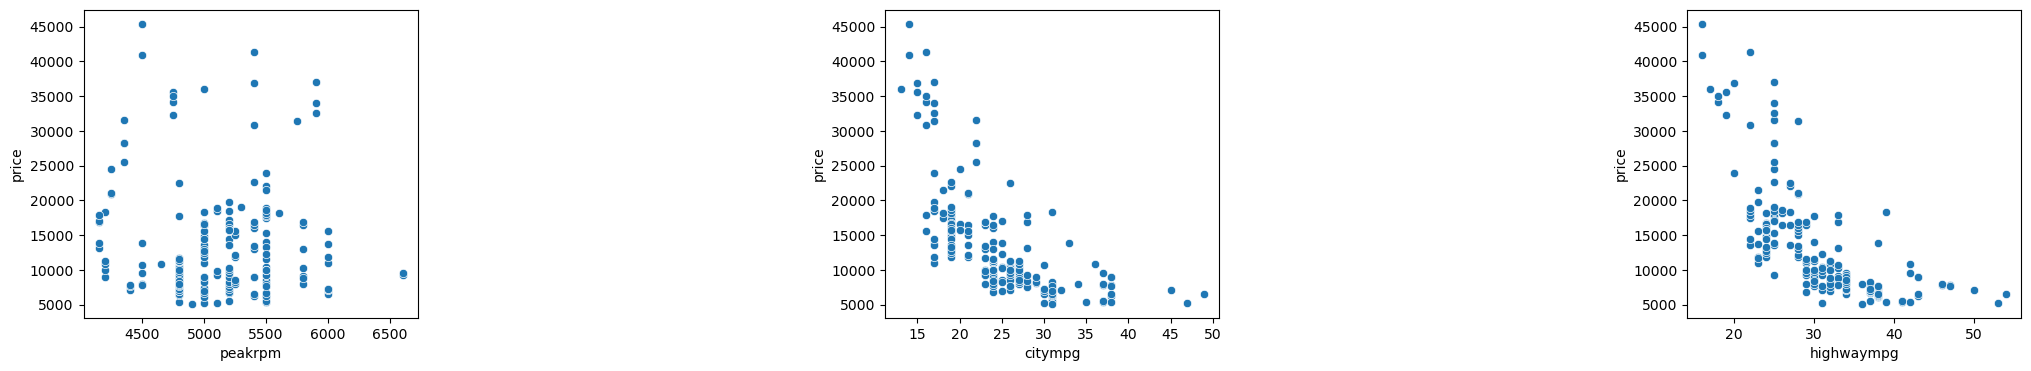

In [34]:
plt.figure(figsize=(25,4))
plt.subplot(1,5,1)
sns.scatterplot(dataset["peakrpm"],dataset["price"])

plt.subplot(1,5,3)
sns.scatterplot(dataset["citympg"],dataset["price"])

plt.subplot(1,5,5)
sns.scatterplot(dataset["highwaympg"],dataset["price"])
plt.show()

###### citympg and highwaympg seems to have a significant negative correlation with price.

<AxesSubplot:xlabel='boreratio', ylabel='price'>

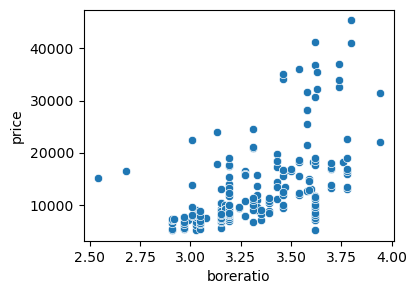

In [40]:
plt.figure(figsize=(4,3))
sns.scatterplot(x=dataset["boreratio"],y=dataset["price"])

##### boreratio seems to having a postive correlation with price.

In [ ]:
#symboling
#carheight
#stroke
#compressionratio
#peakrpm
#citympg
#highwaympg

In [20]:
dataset.drop(columns=["carheight","stroke","compressionratio","peakrpm","aspiration","wheelbase"],inplace=True)
#,"citympg","highwaympg"
#"stroke","compressionratio"
#"symboling",

In [21]:
dataset.columns

Index(['symboling', 'fueltype', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower',
       'citympg', 'highwaympg', 'price', 'CarCompany'],
      dtype='object')

In [22]:
dataset

,symboling,fueltype,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,CarCompany
0,3,gas,two,convertible,rwd,front,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0,alfa-romero
1,3,gas,two,convertible,rwd,front,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0,alfa-romero
2,1,gas,two,hatchback,rwd,front,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0,alfa-romero
3,2,gas,four,sedan,fwd,front,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0,audi
4,2,gas,four,sedan,4wd,front,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,four,sedan,rwd,front,188.8,68.9,2952,ohc,four,141,mpfi,3.78,114,23,28,16845.0,volvo
201,-1,gas,four,sedan,rwd,front,188.8,68.8,3049,ohc,four,141,mpfi,3.78,160,19,25,19045.0,volvo
202,-1,gas,four,sedan,rwd,front,188.8,68.9,3012,ohcv,six,173,mpfi,3.58,134,18,23,21485.0,volvo
203,-1,diesel,four,sedan,rwd,front,188.8,68.9,3217,ohc,six,145,idi,3.01,106,26,27,22470.0,volvo


In [ ]:
### FOR "CarCompany" column one-hot encoding is difficult so we need to create a new feature based avg price.

In [23]:
x=dataset.groupby('CarCompany')['price'].mean()

In [24]:
x

CarCompany
Nissan         10415.666667
alfa-romero    15498.333333
audi           17859.166714
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.500000
jaguar         34600.000000
maxda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
peugeot        15489.090909
plymouth        7963.428571
porsche        31400.500000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen     10077.500000
volvo          18063.181818
Name: price, dtype: float64

In [25]:
df=dataset.merge(x.reset_index(),how='left',on='CarCompany')

In [26]:
df

,symboling,fueltype,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price_x,CarCompany,price_y
0,3,gas,two,convertible,rwd,front,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0,alfa-romero,15498.333333
1,3,gas,two,convertible,rwd,front,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0,alfa-romero,15498.333333
2,1,gas,two,hatchback,rwd,front,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0,alfa-romero,15498.333333
3,2,gas,four,sedan,fwd,front,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0,audi,17859.166714
4,2,gas,four,sedan,4wd,front,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0,audi,17859.166714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,four,sedan,rwd,front,188.8,68.9,2952,ohc,four,141,mpfi,3.78,114,23,28,16845.0,volvo,18063.181818
201,-1,gas,four,sedan,rwd,front,188.8,68.8,3049,ohc,four,141,mpfi,3.78,160,19,25,19045.0,volvo,18063.181818
202,-1,gas,four,sedan,rwd,front,188.8,68.9,3012,ohcv,six,173,mpfi,3.58,134,18,23,21485.0,volvo,18063.181818
203,-1,diesel,four,sedan,rwd,front,188.8,68.9,3217,ohc,six,145,idi,3.01,106,26,27,22470.0,volvo,18063.181818


In [27]:
dataset["carsrange"]=pd.cut(x=df["price_y"] ,bins=[0,10000,20000,40000],right=True,labels=['Budget','Medium','Highend'])

In [28]:
dataset

,symboling,fueltype,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,CarCompany,carsrange
0,3,gas,two,convertible,rwd,front,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0,alfa-romero,Medium
1,3,gas,two,convertible,rwd,front,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0,alfa-romero,Medium
2,1,gas,two,hatchback,rwd,front,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0,alfa-romero,Medium
3,2,gas,four,sedan,fwd,front,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0,audi,Medium
4,2,gas,four,sedan,4wd,front,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0,audi,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,four,sedan,rwd,front,188.8,68.9,2952,ohc,four,141,mpfi,3.78,114,23,28,16845.0,volvo,Medium
201,-1,gas,four,sedan,rwd,front,188.8,68.8,3049,ohc,four,141,mpfi,3.78,160,19,25,19045.0,volvo,Medium
202,-1,gas,four,sedan,rwd,front,188.8,68.9,3012,ohcv,six,173,mpfi,3.58,134,18,23,21485.0,volvo,Medium
203,-1,diesel,four,sedan,rwd,front,188.8,68.9,3217,ohc,six,145,idi,3.01,106,26,27,22470.0,volvo,Medium


In [91]:
#df.drop('price_y',axis=1,inplace=True)

In [29]:
dataset.drop('CarCompany',axis=1,inplace=True)

In [30]:
dataset

,symboling,fueltype,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,carsrange
0,3,gas,two,convertible,rwd,front,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0,Medium
1,3,gas,two,convertible,rwd,front,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0,Medium
2,1,gas,two,hatchback,rwd,front,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0,Medium
3,2,gas,four,sedan,fwd,front,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0,Medium
4,2,gas,four,sedan,4wd,front,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,four,sedan,rwd,front,188.8,68.9,2952,ohc,four,141,mpfi,3.78,114,23,28,16845.0,Medium
201,-1,gas,four,sedan,rwd,front,188.8,68.8,3049,ohc,four,141,mpfi,3.78,160,19,25,19045.0,Medium
202,-1,gas,four,sedan,rwd,front,188.8,68.9,3012,ohcv,six,173,mpfi,3.58,134,18,23,21485.0,Medium
203,-1,diesel,four,sedan,rwd,front,188.8,68.9,3217,ohc,six,145,idi,3.01,106,26,27,22470.0,Medium


In [300]:
dataset.shape

(205, 19)

### SPLITTING THE DATA

In [31]:
X = dataset.drop("price",axis=1)## indepenent variable WHICH REPRESENTS THE INPUTS

In [32]:
X

,symboling,fueltype,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,carsrange
0,3,gas,two,convertible,rwd,front,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,Medium
1,3,gas,two,convertible,rwd,front,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,Medium
2,1,gas,two,hatchback,rwd,front,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,Medium
3,2,gas,four,sedan,fwd,front,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,Medium
4,2,gas,four,sedan,4wd,front,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,four,sedan,rwd,front,188.8,68.9,2952,ohc,four,141,mpfi,3.78,114,23,28,Medium
201,-1,gas,four,sedan,rwd,front,188.8,68.8,3049,ohc,four,141,mpfi,3.78,160,19,25,Medium
202,-1,gas,four,sedan,rwd,front,188.8,68.9,3012,ohcv,six,173,mpfi,3.58,134,18,23,Medium
203,-1,diesel,four,sedan,rwd,front,188.8,68.9,3217,ohc,six,145,idi,3.01,106,26,27,Medium


In [33]:
y = dataset["price"] # dependent variable # WHICH REPRENTS THE OUTPUTS IE..,TARGET

In [34]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [35]:
dataset.columns

Index(['symboling', 'fueltype', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower',
       'citympg', 'highwaympg', 'price', 'carsrange'],
      dtype='object')

### ONE-HOT ENCODING

##### IN ORDER TO FEED THE DATA TO A MODEL , THE DATA SHOULD BE IN NUMERICAL SO ,IN THIS CASE WE HAVE TO CONVERT  THE CATEGORICAL DATA TO NUMERICAL , WITH THE HELP OF "ENCODING" TECHINQUE

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
from sklearn.compose import ColumnTransformer

In [38]:
oh=OneHotEncoder()

In [39]:
ct = ColumnTransformer(transformers = [("ohe",oh,["fueltype","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem","carsrange"])]
                       ,remainder = "passthrough")

In [40]:
X=ct.fit_transform(X)

In [41]:
X

array([[  0.,   1.,   0., ..., 111.,  21.,  27.],
       [  0.,   1.,   0., ..., 111.,  21.,  27.],
       [  0.,   1.,   0., ..., 154.,  19.,  26.],
       ...,
       [  0.,   1.,   1., ..., 134.,  18.,  23.],
       [  1.,   0.,   1., ..., 106.,  26.,  27.],
       [  0.,   1.,   1., ..., 114.,  19.,  25.]])

In [42]:
ct.get_feature_names_out()

array(['ohe__fueltype_diesel', 'ohe__fueltype_gas',
       'ohe__doornumber_four', 'ohe__doornumber_two',
       'ohe__carbody_convertible', 'ohe__carbody_hardtop',
       'ohe__carbody_hatchback', 'ohe__carbody_sedan',
       'ohe__carbody_wagon', 'ohe__drivewheel_4wd', 'ohe__drivewheel_fwd',
       'ohe__drivewheel_rwd', 'ohe__enginelocation_front',
       'ohe__enginelocation_rear', 'ohe__enginetype_dohc',
       'ohe__enginetype_dohcv', 'ohe__enginetype_l',
       'ohe__enginetype_ohc', 'ohe__enginetype_ohcf',
       'ohe__enginetype_ohcv', 'ohe__enginetype_rotor',
       'ohe__cylindernumber_eight', 'ohe__cylindernumber_five',
       'ohe__cylindernumber_four', 'ohe__cylindernumber_six',
       'ohe__cylindernumber_three', 'ohe__cylindernumber_twelve',
       'ohe__cylindernumber_two', 'ohe__fuelsystem_1bbl',
       'ohe__fuelsystem_2bbl', 'ohe__fuelsystem_4bbl',
       'ohe__fuelsystem_idi', 'ohe__fuelsystem_mfi',
       'ohe__fuelsystem_mpfi', 'ohe__fuelsystem_spdi',
       'ohe

In [43]:
column_name =[]
for each_col in ct.get_feature_names_out():
    print(each_col)#wecan see unwanted words in the col names
                     #so,by using split function we can get only required part of  name.
    column_name.append(each_col.split("_")[-1])#spliting by "_"& getting the last elemrnt (-1)

ohe__fueltype_diesel
ohe__fueltype_gas
ohe__doornumber_four
ohe__doornumber_two
ohe__carbody_convertible
ohe__carbody_hardtop
ohe__carbody_hatchback
ohe__carbody_sedan
ohe__carbody_wagon
ohe__drivewheel_4wd
ohe__drivewheel_fwd
ohe__drivewheel_rwd
ohe__enginelocation_front
ohe__enginelocation_rear
ohe__enginetype_dohc
ohe__enginetype_dohcv
ohe__enginetype_l
ohe__enginetype_ohc
ohe__enginetype_ohcf
ohe__enginetype_ohcv
ohe__enginetype_rotor
ohe__cylindernumber_eight
ohe__cylindernumber_five
ohe__cylindernumber_four
ohe__cylindernumber_six
ohe__cylindernumber_three
ohe__cylindernumber_twelve
ohe__cylindernumber_two
ohe__fuelsystem_1bbl
ohe__fuelsystem_2bbl
ohe__fuelsystem_4bbl
ohe__fuelsystem_idi
ohe__fuelsystem_mfi
ohe__fuelsystem_mpfi
ohe__fuelsystem_spdi
ohe__fuelsystem_spfi
ohe__carsrange_Budget
ohe__carsrange_Highend
ohe__carsrange_Medium
remainder__symboling
remainder__carlength
remainder__carwidth
remainder__curbweight
remainder__enginesize
remainder__boreratio
remainder__horsepowe

In [44]:
column_name

['diesel',
 'gas',
 'four',
 'two',
 'convertible',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 '4wd',
 'fwd',
 'rwd',
 'front',
 'rear',
 'dohc',
 'dohcv',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor',
 'eight',
 'five',
 'four',
 'six',
 'three',
 'twelve',
 'two',
 '1bbl',
 '2bbl',
 '4bbl',
 'idi',
 'mfi',
 'mpfi',
 'spdi',
 'spfi',
 'Budget',
 'Highend',
 'Medium',
 'symboling',
 'carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'citympg',
 'highwaympg']

In [45]:
X= pd.DataFrame(X)

In [46]:
X.columns=column_name

In [47]:
X       # THIS DATA BECOMES OUR INPUT TO OUE MODEL

,diesel,gas,four,two,convertible,hardtop,hatchback,sedan,wagon,4wd,...,Medium,symboling,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,171.2,65.5,2823.0,152.0,2.68,154.0,19.0,26.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,2.0,176.6,66.2,2337.0,109.0,3.19,102.0,24.0,30.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,2.0,176.6,66.4,2824.0,136.0,3.19,115.0,18.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,-1.0,188.8,68.9,2952.0,141.0,3.78,114.0,23.0,28.0
201,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,-1.0,188.8,68.8,3049.0,141.0,3.78,160.0,19.0,25.0
202,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,-1.0,188.8,68.9,3012.0,173.0,3.58,134.0,18.0,23.0
203,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,-1.0,188.8,68.9,3217.0,145.0,3.01,106.0,26.0,27.0


In [48]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

## TRAIN-TEST SPLIT

### SPILTTING OUR DATA INTO "TRAINING" AND "TEST" DATA

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,x_test,y_train,y_test = train_test_split(X,y,train_size = 0.75,random_state=35)

In [51]:
X_train

,diesel,gas,four,two,convertible,hardtop,hatchback,sedan,wagon,4wd,...,Medium,symboling,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg
153,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,169.7,63.6,2280.0,92.0,3.05,62.0,31.0,37.0
109,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,198.9,68.4,3230.0,120.0,3.46,97.0,19.0,24.0
124,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,3.0,173.2,66.3,2818.0,156.0,3.59,145.0,19.0,24.0
140,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,2.0,157.3,63.8,2240.0,108.0,3.62,73.0,26.0,31.0
71,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,-1.0,202.6,71.7,3740.0,234.0,3.46,155.0,16.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,180.2,66.9,2661.0,136.0,3.19,110.0,19.0,24.0
33,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,150.0,64.0,1940.0,92.0,2.91,76.0,30.0,34.0
183,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,2.0,171.7,65.5,2209.0,109.0,3.19,85.0,27.0,34.0
15,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,189.0,66.9,3230.0,209.0,3.62,182.0,16.0,22.0


In [52]:
y_train

153     6918.0
109    12440.0
124    12764.0
140     7603.0
71     34184.0
        ...   
191    13295.0
33      6529.0
183     7975.0
15     30760.0
201    19045.0
Name: price, Length: 153, dtype: float64

In [208]:
x_test

,diesel,gas,std,turbo,four,two,convertible,hardtop,hatchback,sedan,...,Medium,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg
200,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,109.1,188.8,68.9,2952.0,141.0,3.78,114.0,23.0,28.0
133,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,99.1,186.6,66.5,2695.0,121.0,3.54,110.0,21.0,28.0
181,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,104.5,187.8,66.5,3151.0,161.0,3.27,156.0,19.0,24.0
157,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,95.7,166.3,64.4,2109.0,98.0,3.19,70.0,30.0,37.0
28,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,103.3,174.6,64.6,2535.0,122.0,3.34,88.0,24.0,30.0
165,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,94.5,168.7,64.0,2265.0,98.0,3.24,112.0,26.0,29.0
72,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,96.6,180.3,70.5,3685.0,234.0,3.46,155.0,16.0,18.0
136,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,99.1,186.6,66.5,2808.0,121.0,3.54,160.0,19.0,26.0
43,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,94.3,170.7,61.8,2337.0,111.0,3.31,78.0,24.0,29.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,99.8,176.6,66.2,2337.0,109.0,3.19,102.0,24.0,30.0


In [209]:
y_test

200    16845.0
133    12170.0
181    15750.0
157     7198.0
28      8921.0
165     9298.0
72     35056.0
136    18150.0
43      6785.0
3      13950.0
113    16695.0
80      9959.0
166     9538.0
101    13499.0
145    11259.0
0      13495.0
10     16430.0
105    19699.0
163     8058.0
194    12940.0
175     9988.0
77      6189.0
135    15510.0
14     24565.0
83     14869.0
177    11248.0
121     6692.0
22      6377.0
46     11048.0
17     36880.0
81      8499.0
49     36000.0
27      8558.0
68     28248.0
174    10698.0
25      6692.0
7      18920.0
21      5572.0
86      8189.0
112    16900.0
92      6849.0
38      9095.0
64     11245.0
146     7463.0
96      7499.0
36      7295.0
31      6855.0
173     8948.0
115    16630.0
66     18344.0
164     8238.0
127    34028.0
Name: price, dtype: float64

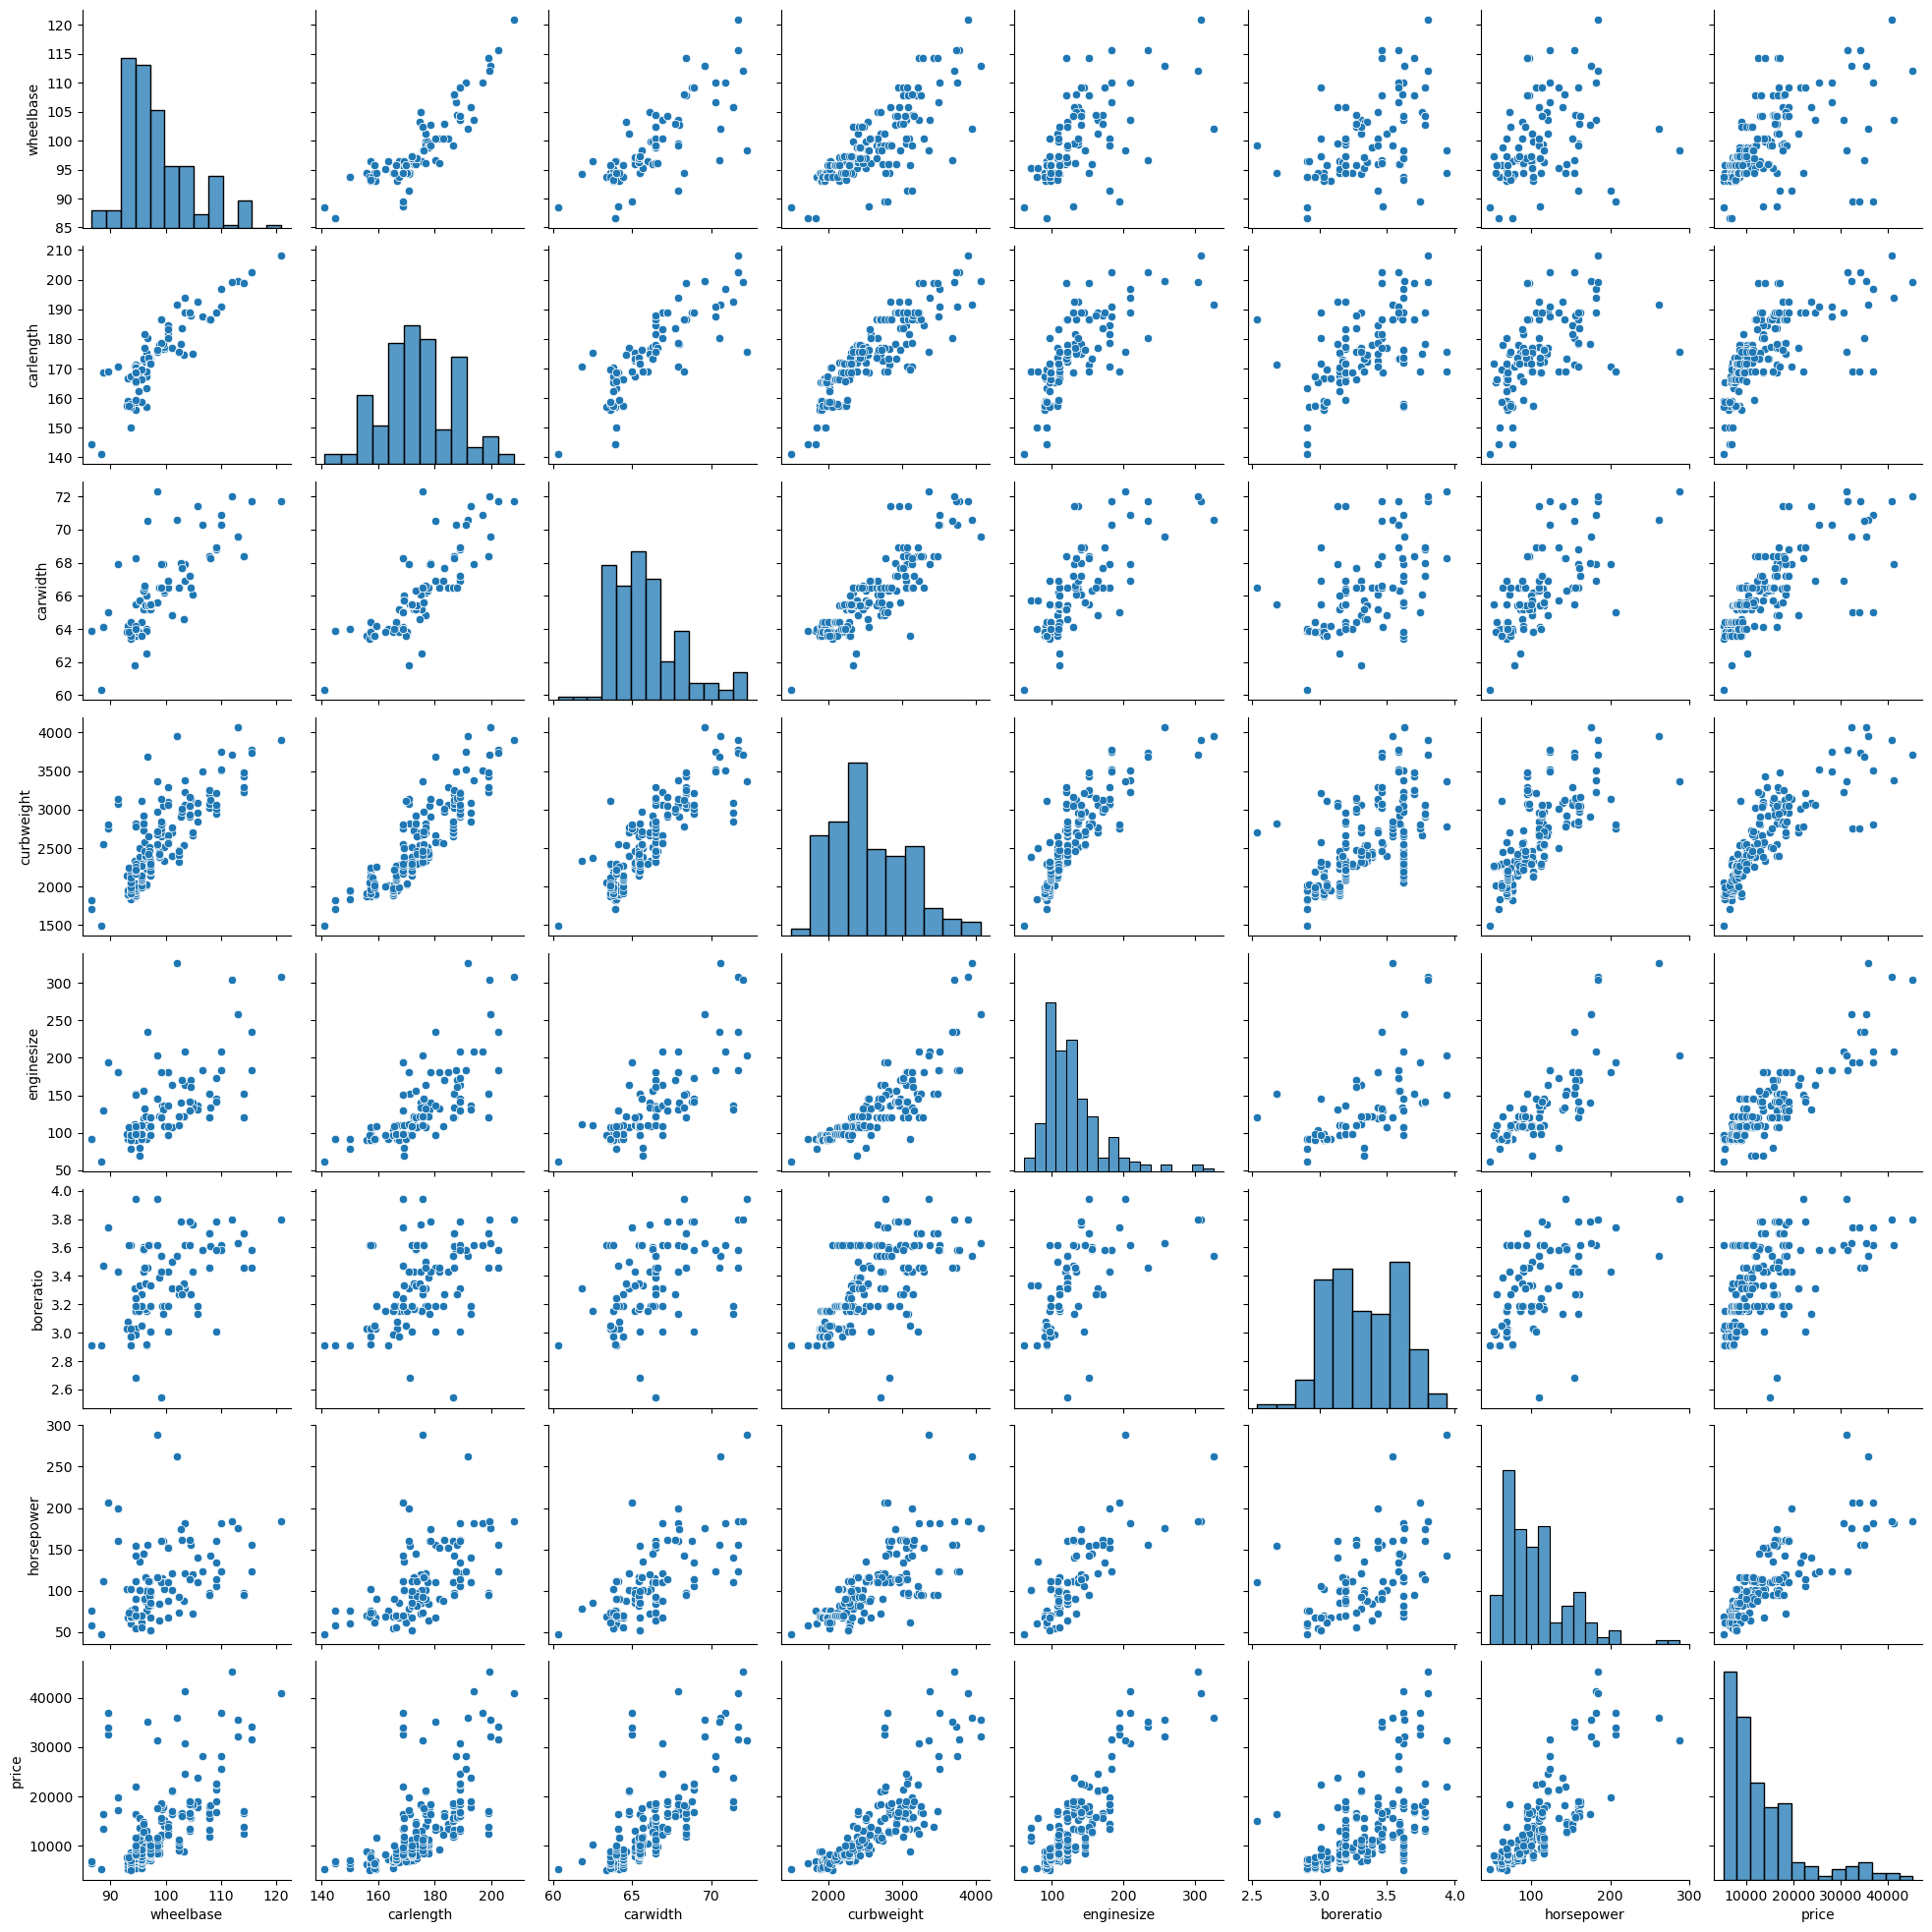

In [128]:
sns.pairplot(dataset,vars=["wheelbase","carlength","carwidth","curbweight","enginesize","boreratio","horsepower","price"])
plt.show()

### BUILDING THE MODELS

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
linear_model=LinearRegression()

In [55]:
linear_model.fit(X_train,y_train)

LinearRegression()

### PREDICTION

In [56]:
y_pred=linear_model.predict(x_test)

In [57]:
y_pred

array([16800.66354123, 12864.2468827 , 17638.93215782,  6225.58877042,
        9498.74483791,  8092.50655565, 41782.9283314 , 13546.03086226,
        6968.72251046, 11598.39446848, 13581.04266977,  8478.82895889,
        7256.25808259, 16910.79344512, 11755.21789014, 13917.4097515 ,
       17139.99234975, 20456.18090725,  7326.6364244 , 15714.89172468,
       10174.98761425,  5891.14711619, 13168.48953806, 25313.42354581,
       13554.66469183, 10387.47454816,  6174.00178312,  5363.68000378,
        9707.07541157, 34011.05300771,  8206.54315777, 42299.49153845,
        9664.74325747, 29341.27035109, 10542.89542982,  6718.02510383,
       17435.58251625,  5628.35121318,  9903.43845011, 15669.08394146,
        7116.41076706,  9227.84178304, 10626.64678552,  8141.05541457,
        7275.77596749,  7208.18644727,  6464.01427253, 10819.45367082,
       14237.32559405, 12587.61419366,  6490.38795134, 32475.61457941])

In [58]:
y_pred_train=linear_model.predict(X_train)

In [59]:
y_pred_train

array([ 6180.12987854, 13445.67523822, 13289.9960145 ,  6750.84466159,
       38617.27803998, 11490.68974588, 10446.99905629,  5405.56455956,
       10082.70272624, 40494.422384  , 23332.10633444, 11160.35057909,
       23401.08285115,  6726.08241243, 17780.84060321,  8205.70546685,
        8503.17282744, 21228.11187678,  6964.48192988, 17587.13504683,
       16624.11475601, 17974.94749349, 10388.2281268 ,  9963.23731733,
       16847.23020845,  7460.88142958, 17650.40704699, 14784.89244296,
       13578.81093432, 28523.51233989,  7076.40974134,  8355.22843163,
        5557.01134261,  7386.37258872,  7180.54794297,  5606.50946641,
        8758.43049112,  6868.77902688,  7375.8231482 , 31400.5       ,
       11510.00673987,  8592.15350205,  6451.45951947, 15645.        ,
       19094.35456679,  6180.90202606, 15278.14325048, 11180.25978473,
        6779.31434346, 11947.51808423, 15280.47759772, 11137.4115686 ,
       18838.82435214,  7216.45794777,  6415.55288888,  9476.93981367,
      

### EVALUATION

In [60]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [61]:
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred)
mae_train=mean_absolute_error(y_train,y_pred_train)
mae_test=mean_absolute_error(y_test,y_pred)

In [62]:
print("mse_train_score : ",mse_train)
print("mse_test_score : ",mse_test)
print("mae_train_score : ",mae_train)
print("mae_test_score : ",mae_test)

mse_train_score :  3175699.149539951
mse_test_score :  4520581.16536746
mae_train_score :  1274.253967548598
mae_test_score :  1463.4105043797738


In [65]:
r2_score=r2_score(y_test,y_pred)

In [66]:
r2_score

0.928384375882546

In [67]:
print(f"Linear Regression train score : {linear_model.score(X_train,y_train)}")

Linear Regression train score : 0.9500507732295971


In [68]:
print(f"Linear Regression train score : {linear_model.score(x_test,y_test)}")

Linear Regression train score : 0.928384375882546
